<a href="https://colab.research.google.com/github/lseidy/IA_learning/blob/master/MLP_Funciona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

In [ ]:
from sklearn.datasets import load_digits

### Pre Processamento

In [ ]:
np.random.seed(42)
digits = load_digits()
X_data, y_data = digits.data, digits.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25, random_state=42)

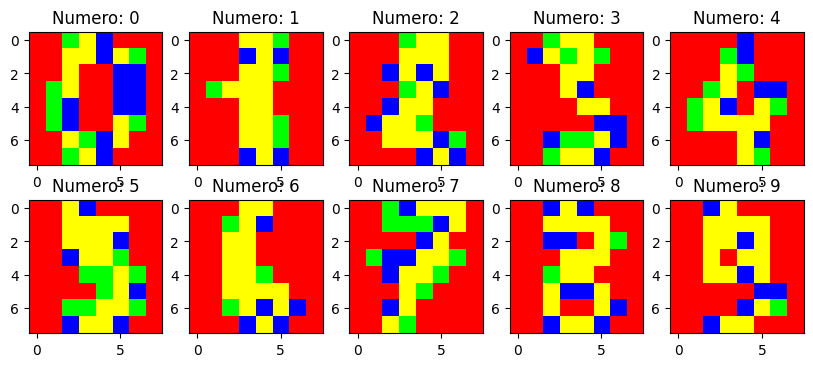

In [ ]:
plt.figure(figsize=(10, 4))

colors = np.array([[1, 0, 0],   # Red
                   [0, 1, 0],   # Green
                   [0, 0, 1],   # Blue
                   [1, 1, 0]])  # Yellow
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_data[i].reshape(8, 8), cmap= plt.matplotlib.colors.ListedColormap(colors))
    plt.title(f'Numero: {y_data[i]}')
plt.show()

In [ ]:
digits.DESCR

".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 1797\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttps://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixel

In [ ]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [ ]:
digits.target, digits.data

(array([0, 1, 2, ..., 8, 9, 8]),
 array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]))

### Definicao MLP

In [ ]:
class MLP:
    def __init__(self, inputs, hidden_layers, output, learning_rate=0.01, epochs=100, activation = "relu"):

      self.inputs = inputs
      self.output = output
      self.hidden_layers = hidden_layers
      self.learning_rate = learning_rate
      self.epochs = epochs

      if activation == 'relu' or activation == 'sigmoid':
        self.init_weights_bias()
        self.activation = activation
        pass
      else:
        return print("nenhuma funcao de ativacao selecionada")

    def init_weights_bias(self):
      #inicizalicao de pesos
      self.in_w = np.random.randn(self.inputs, self.hidden_layers)
      self.bias = np.zeros((1, self.hidden_layers))

      #ultima camada
      self.w_out = np.random.randn(self.hidden_layers, self.output)
      self.bias_out = np.zeros((1, self.output))

    def sigmoid(self, value):
      return 1 / (1 + np.exp(-value))
    def sigmoid_derivative(self, value):
      return value * (1 - value)

    def relu(self, value):
      return np.maximum(0, value)
    def relu_derivative(self,value):
      return np.where(value > 0, 1, 0)

    def activation_func(self,value):
      if self.activation == 'relu':
        return self.relu(value)
      else:
        return self.sigmoid(value)
    def activation_func_derivative(self,value):
      if self.activation == 'relu':
        return self.relu_derivative(value)
      else:
        return self.sigmoid_derivative(value)

    def forward(self, input_neuron):
      self.in_layer = np.dot(input_neuron, self.in_w) + self.bias
      self.out_hidden = self.activation_func(self.in_layer)
      self.out_layer = np.dot(self.out_hidden, self.w_out) + self.bias_out

      self.predicted = self.activation_func(self.out_layer)

    def backpropagation(self, input, target):

      self.loss = target - self.predicted


      data_out = self.loss * self.activation_func_derivative(self.predicted)
      hidden_loss = data_out.dot(self.w_out.T)
      hidden_layer_out = hidden_loss * self.activation_func_derivative(self.out_hidden)


      self.w_out += self.out_hidden.T.dot(data_out) * self.learning_rate
      self.bias_out += np.sum(data_out, axis=0, keepdims=True) * self.learning_rate
      self.in_w += input.T.dot(hidden_layer_out) * self.learning_rate
      self.bias += np.sum(hidden_layer_out, axis=0, keepdims=True) * self.learning_rate

    def fit(self, input, target, epochs):
      for epoch in range(epochs):
        self.forward(input)
        self.backpropagation(input, target)

    def predict(self, input):
      self.forward(input)
      return np.argmax(self.predicted, axis=1)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
n_classes = 10
y_train_encoded = np.zeros((len(y_train), n_classes))
for i in range(len(y_train)):
  y_train_encoded[i, y_train[i]] = 1

print(y_train_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
X_test.shape

(450, 64)

In [ ]:
model = MLP(X_train.shape[1], 256, n_classes, 0.01, activation = "relu")
model.fit(X_train, y_train_encoded, 1000)


In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy: 9.56%


In [ ]:
model2 = MLP(X_train.shape[1], 32, n_classes, 0.01, activation = "sigmoid")
model2.fit(X_train, y_train_encoded, 1000)

y_pred = model2.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')

Accuracy: 96.22%


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       1.00      0.81      0.90        37
           2       0.84      0.97      0.90        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.97      0.98      0.97        59
           6       0.94      0.98      0.96        45
           7       0.98      0.98      0.98        41
           8       0.97      0.95      0.96        38
           9       0.94      0.96      0.95        48

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



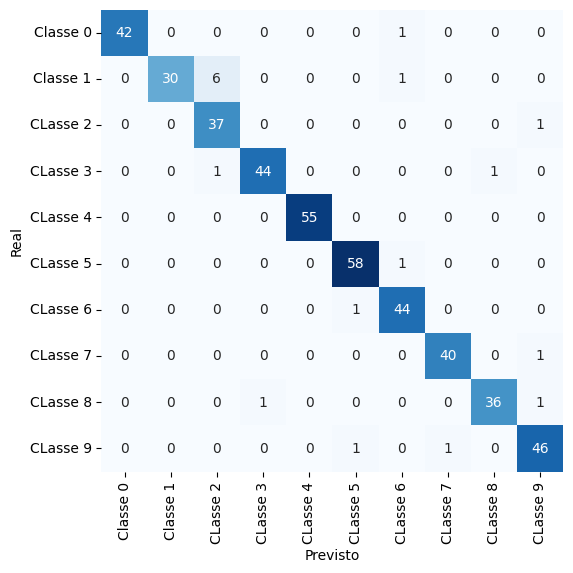

In [ ]:
confusion = confusion_matrix(y_test, y_pred)

# Plotar a matriz de confusão usando Seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False, square=True, xticklabels=["Classe 0", "Classe 1", "CLasse 2", "CLasse 3", "CLasse 4", "CLasse 5", "CLasse 6", "CLasse 7", "CLasse 8", "CLasse 9"], yticklabels=["Classe 0", "Classe 1", "CLasse 2", "CLasse 3", "CLasse 4", "CLasse 5", "CLasse 6", "CLasse 7", "CLasse 8", "CLasse 9"])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()